# NLP Preprocesing

### Here, we will performing pre-processing of documents using nltk, which is important before feature extraction phase

## Downloading important resources

### Before proceeding further, we need to install nltk library suite in our system using the command

`pip install nltk`

In [2]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 36.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [5]:
# After installing , we need to import and download the resources (corpora, models, ...)
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/datalore/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/datalore/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/datalore/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/datalore/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/datalore/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to
[nltk_data]    |     /home/datalore/nltk_data...

True

##### A pop-up window will open and we need to select `All` to download all the packages, corporas provided by nltk

## Get a raw document from the nltk corpora

#### We will be retrieving a sample document from the nltk corpora, here we will be using the state_union corpus

In [63]:
from nltk.corpus import state_union

sample_document = state_union.raw("2006-GWBush.txt")

In [7]:
sample_document[:100]

"PRESIDENT GEORGE W. BUSH'S ADDRESS BEFORE A JOINT SESSION OF THE CONGRESS ON THE STATE OF THE UNION\n"

## Stop-word Removal
 
Here we are concerned about filtering the document from unnecessary words which include determiners, articles, ...
But first we need to tokenize the document into words, and then filter by stop_word removal

In [64]:
# Word_tokenize the document

from nltk.tokenize import word_tokenize

words = word_tokenize(sample_document)

# Print the first 15 words
print(words[:15])

['PRESIDENT', 'GEORGE', 'W.', 'BUSH', "'S", 'ADDRESS', 'BEFORE', 'A', 'JOINT', 'SESSION', 'OF', 'THE', 'CONGRESS', 'ON', 'THE']


In [65]:
# Stop-word

from nltk.corpus import stopwords
# Set of english stopwords
stop_words = set(stopwords.words("english"))

# Filter by stop_words

words = [w for w in words if w.lower() not in stop_words]

# Print the first 15 words
print(words[:15])

['PRESIDENT', 'GEORGE', 'W.', 'BUSH', "'S", 'ADDRESS', 'JOINT', 'SESSION', 'CONGRESS', 'STATE', 'UNION', 'January', '31', ',', '2006']


# Stemming

##### After stop-word removal, we perform stemming, which is basically a process of reduction of words into their root_word, without any consideration for meaning

In [6]:
# For stemming we will use the PorterStemmer class provided by nltk

from nltk.stem import PorterStemmer

ps = PorterStemmer()

word_stems = []

for word in words:
    word_stem = ps.stem(word)
    word_stems.append(word_stem)

# Printing the first 15 stems
print(word_stems[:15])

['presid', 'georg', 'w.', 'bush', "'s", 'address', 'joint', 'session', 'congress', 'state', 'union', 'januari', '31', ',', '2006']


As we can see from above that the word `president` is reduced to its root word `presid`

# Lemmatization

##### Unlike stemming, lemmatization reduces a word to its root_word, such that the root_word has some meaning.

In [7]:
# For lemmatization we will use the WordNetLemmatizer

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

word_lemmas=[]

for word in words:
    word_lemma = lemmatizer.lemmatize(word)
    word_lemmas.append(word_lemma)

# Printing the first 15 lemmas
print(word_lemmas[:15])

['PRESIDENT', 'GEORGE', 'W.', 'BUSH', "'S", 'ADDRESS', 'JOINT', 'SESSION', 'CONGRESS', 'STATE', 'UNION', 'January', '31', ',', '2006']


Here unlike stemming, the meaning of the lemmas are intact

# Part of Speech Tagging

##### To maintain the context throughout, it is necessary to tag words by their parts of speech, so that we can filter them by tags to do analysis

In [8]:
pos_tags = nltk.pos_tag(words)

# Print the first 15 words by their tags
print(pos_tags[:15])

[('PRESIDENT', 'NNP'), ('GEORGE', 'NNP'), ('W.', 'NNP'), ('BUSH', 'NNP'), ("'S", 'POS'), ('ADDRESS', 'NNP'), ('JOINT', 'NNP'), ('SESSION', 'NNP'), ('CONGRESS', 'NNP'), ('STATE', 'NNP'), ('UNION', 'NNP'), ('January', 'NNP'), ('31', 'CD'), (',', ','), ('2006', 'CD')]


The tag list and their meaning is described herewith 
```
    CC coordinating conjunction
    CD cardinal digit
    DT determiner
    EX existential there (like: “there is” … think of it like “there exists”)
    FW foreign word
    IN preposition/subordinating conjunction
    JJ adjective ‘big’
    JJR adjective, comparative ‘bigger’
    JJS adjective, superlative ‘biggest’
    LS list marker 1)
    MD modal could, will
    NN noun, singular ‘desk’
    NNS noun plural ‘desks’
    NNP proper noun, singular ‘Harrison’
    NNPS proper noun, plural ‘Americans’
    PDT predeterminer ‘all the kids’
    POS possessive ending parent’s
    PRP personal pronoun I, he, she
    PRP$ possessive pronoun my, his, hers
    RB adverb very, silently,
    RBR adverb, comparative better
    RBS adverb, superlative best
    RP particle give up
    TO, to go ‘to’ the store.
    UH interjection, errrrrrrrm
    VB verb, base form take
    VBD verb, past tense took
    VBG verb, gerund/present participle taking
    VBN verb, past participle taken
    VBP verb, sing. present, non-3d take
    VBZ verb, 3rd person sing. present takes
    WDT wh-determiner which
    WP wh-pronoun who, what
    WP$ possessive wh-pronoun whose
    WRB wh-abverb where, when

```

# Named-Entity Recognition

##### Apart from tagging words by their parts of speech, we can also group the words based on their context and meaning like grouping by name of persons, date , location, organistaion

In [9]:
namedEnt = nltk.ne_chunk(pos_tags)

# Print the first 15 chunks
print(namedEnt[:15])

[('PRESIDENT', 'NNP'), Tree('PERSON', [('GEORGE', 'NNP'), ('W.', 'NNP'), ('BUSH', 'NNP')]), ("'S", 'POS'), Tree('ORGANIZATION', [('ADDRESS', 'NNP')]), ('JOINT', 'NNP'), ('SESSION', 'NNP'), Tree('ORGANIZATION', [('CONGRESS', 'NNP')]), ('STATE', 'NNP'), Tree('ORGANIZATION', [('UNION', 'NNP')]), ('January', 'NNP'), ('31', 'CD'), (',', ','), ('2006', 'CD'), ('PRESIDENT', 'NN'), (':', ':')]


To get more clarity we can use `namedEnt.draw()` to get the tree-structure of the named entities

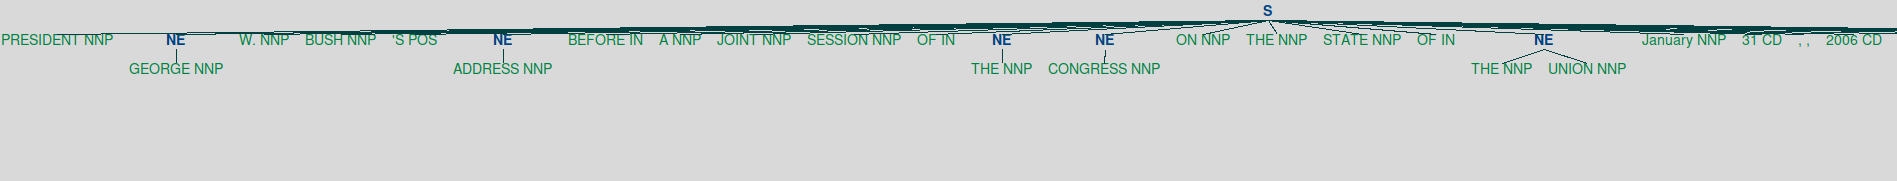

# Word embeddings

## One hot vector  
  
According to [wikipedia](https://en.wikipedia.org/wiki/One-hot),  
  
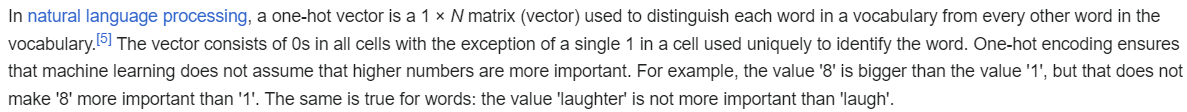  

Step 1:
 - We import the `numpy` library for array manipulation.

In [10]:
import numpy as np

Step 2:
- We take the set of unique words in our dataset

In [11]:
unique_words = set()
for sentence in sample_document.split('\n'):
    for word in sentence.split():
        unique_words.add(word.lower())

Step 3:
- We create a dictionary to map each unique word to an index

In [12]:
word_to_index = {}
for i, word in enumerate(unique_words):
    word_to_index[word] = i

Step 4:
- We initialize a 2D matrix of all 0s for our entire set of one-hot vectors

In [13]:
one_hot_vectors = np.zeros((len(unique_words), len(unique_words)))

Step 5:
- We set the exact position to 1 for each word as per our mapping method

In [14]:
for word in unique_words:
    sentence_vectors = []
    idx = word_to_index[word]
    one_hot_vectors[idx, idx] = 1

In [15]:
one_hot_vectors[word_to_index['taxpayer']]

array([0., 0., 0., ..., 0., 0., 0.])

## Bag-of-Words (BoW)  
  
According to [wikipedia](https://en.wikipedia.org/wiki/Bag-of-words_model),  
  
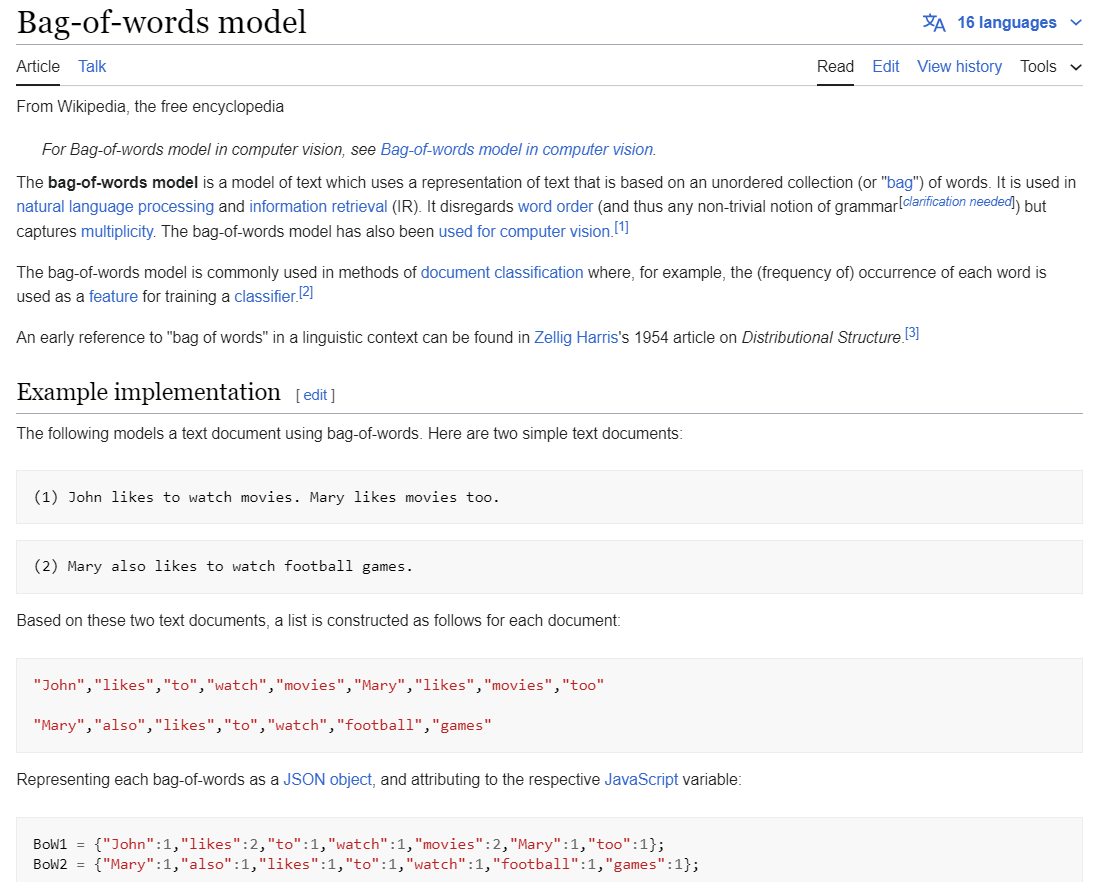

Step 1: 
 - We will first preprocess the data, in order to:
    - Convert text to lower case.
    - Remove all non-word characters.
    - Remove all punctuations.

In [16]:
import re

dataset = nltk.sent_tokenize(sample_document)
for i in range(len(dataset)):
    dataset[i] = dataset[i].lower()
    dataset[i] = re.sub(r'\W', ' ', dataset[i])
    dataset[i] = re.sub(r'\s+', ' ', dataset[i])

Step 2: Obtaining most frequent words in our text.

We will apply the following steps to generate our model:
- We declare a dictionary to hold our bag of words.
- Next we tokenize each sentence to words.
- Now for each word in sentence, we check if the word exists in our dictionary.
- If it does, then we increment its count by 1. If it doesn’t, we add it to our dictionary and set its count as 1.

In [17]:
word2count = {}
for data in sample_document.split(' '):
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

Sample count:

In [18]:
word2count['taxpayer']

1

The entire BoW for our dataset:

In [19]:
word2count

{'PRESIDENT': 2,
 'GEORGE': 1,
 'W': 5,
 '.': 349,
 'BUSH': 1,
 "'S": 1,
 'ADDRESS': 1,
 'BEFORE': 1,
 'A': 8,
 'JOINT': 1,
 'SESSION': 1,
 'OF': 2,
 'THE': 4,
 'CONGRESS': 1,
 'ON': 1,
 'STATE': 1,
 'UNION': 1,
 'January': 1,
 '31': 6,
 ',': 319,
 '2006': 7,
 ':': 15,
 'Thank': 1,
 'you': 14,
 'all': 19,
 'Mr': 1,
 'Speaker': 1,
 'Vice': 1,
 'President': 7,
 'Cheney': 1,
 'members': 10,
 'of': 186,
 'Congress': 13,
 'the': 260,
 'Supreme': 2,
 'Court': 2,
 'and': 239,
 'diplomatic': 1,
 'corps': 1,
 'distinguished': 1,
 'guests': 1,
 'fellow': 4,
 'citizens': 9,
 'Today': 4,
 'our': 96,
 'nation': 17,
 'lost': 2,
 'a': 104,
 'beloved': 1,
 'graceful': 1,
 'courageous': 1,
 'woman': 1,
 'who': 15,
 'called': 2,
 'America': 43,
 'to': 170,
 'its': 8,
 'founding': 1,
 'ideals': 2,
 'carried': 1,
 'on': 22,
 'noble': 2,
 'dream': 2,
 'Tonight': 7,
 'we': 85,
 'are': 36,
 'comforted': 1,
 'by': 37,
 'hope': 8,
 'glad': 1,
 'reunion': 1,
 'with': 26,
 'husband': 1,
 'was': 3,
 'taken': 3,
 

## TF-IDF  

According to [wikipedia](https://en.wikipedia.org/wiki/Tf%E2%80%93idf),  
  
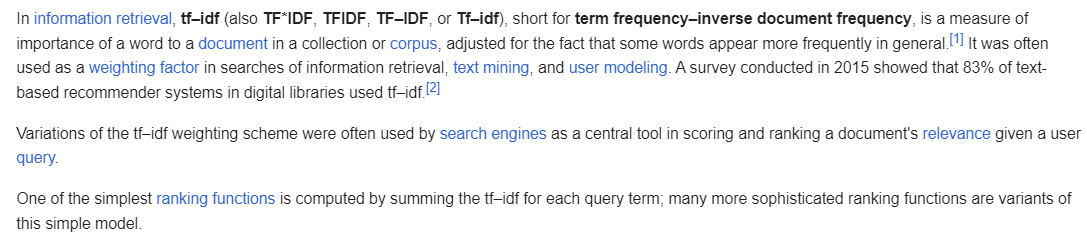  

First of all, we create the set of documents,

In [20]:
docs = []
for sentence in sample_document.split('\n'):
  docs.append(sentence)

We import `sklearn`'s [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer) for fast `idf` calculation.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

After that, we initialize an object and apply the [`fit_transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.fit_transform) method on our documents.

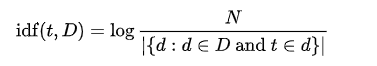

In [22]:
tfidf = TfidfVectorizer()
result = tfidf.fit_transform(docs)

We define two auxiliary functions:

In [23]:
def get_tf(doc):
    tf = {}
    doc = doc.lower()
    doc_lst = doc.split(' ')
    s = len(doc_lst)
    for tkn in doc_lst:
        if tkn not in tf:
            tf[tkn] = 1
        else:
            tf[tkn] += 1
    tf = {tkn: t/s for tkn, t in tf.items()}
    return tf

def get_tfidf(vectorizer, doc):
    tf = get_tf(doc)
    print("\ntf-idf values:")
    for tkn in tf.keys():
        for w, idf in zip(vectorizer.get_feature_names_out(), vectorizer.idf_):
            if tkn == w:
                t = tf[tkn] * idf
                print(tkn, ':', t)

Finally, we visualize the `tfidf` for the first document.

In [24]:
d = docs[0]
print(f'Document: {d}')
get_tfidf(tfidf, d)

Document: PRESIDENT GEORGE W. BUSH'S ADDRESS BEFORE A JOINT SESSION OF THE CONGRESS ON THE STATE OF THE UNION

tf-idf values:
president : 0.21574461603222617
george : 0.23172695339065846
address : 0.2231630267335885
before : 0.23172695339065846
joint : 0.29276096942777563
session : 0.29276096942777563
of : 0.20044017187780394
the : 0.29553164803891363
congress : 0.18082191273098316
on : 0.16483957537255092
state : 0.20920111405131597
union : 0.20920111405131597


# Word2vec  
Word2vec is a **neural network** based language model that converts ***words*** into ***vectors*** (***embeddings***) in a high-dimensional space.  
This model was first introduced in [this arxiv paper](https://arxiv.org/abs/1301.3781).  
   
However, we would refer **ch. 6** of **<u>Speech and Language Processing (3e draft)</u>** (by Dan Jurafsky and James H. Martin) and follow ***skip-gram with negative sampling (SGNS)*** method.  
[Link here](https://web.stanford.edu/~jurafsky/slp3/6.pdf).  
  
At first, we import required modules.

In [66]:
import random

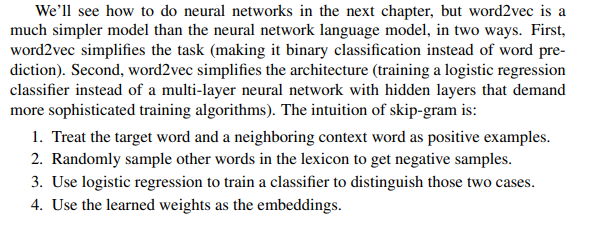

In [69]:
# create vocabulary
vocab = list(set(words))

# a lookup table (output -> integer) simplifies numpy array indexing
word2idx = {word:idx for idx, word in enumerate(vocab)}

VOCAB_SIZE = len(vocab)
DOC_SIZE = len(words)

For simplicity, we consider an embedding of 100 dimensions for our output.  
We keep the window relatively small -> 2. That is, we would consider 2 words to the left, and 2 words to the right of the center word.    
Plus, we randomly take 4 negative samples for every neighbor of a center word.

In [70]:
EMBED_DIM = 100
WINDOW_SIZE = 2
NEG_SAMPLE_RATIO = 4

We initialize two types of weights for a single word $w$ -
- when $w$ is a center word
- when $w$ is in the context but not a center word

In [71]:
W_center = np.random.rand(VOCAB_SIZE, EMBED_DIM)
W_cntxt = np.random.rand(VOCAB_SIZE, EMBED_DIM)

The procedure for our neural network ***forward*** function -  
  
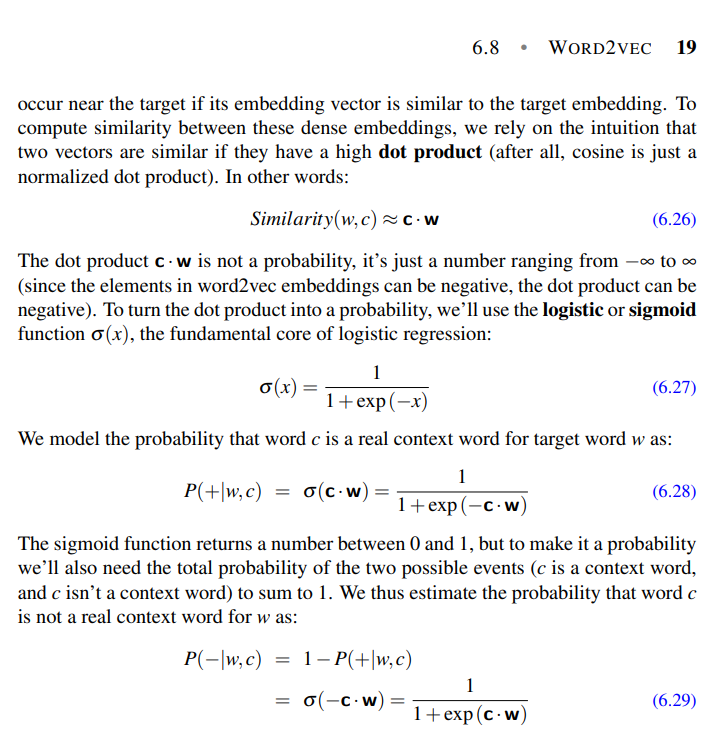

In [72]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

We compute the loss in each step using this formula -  
  
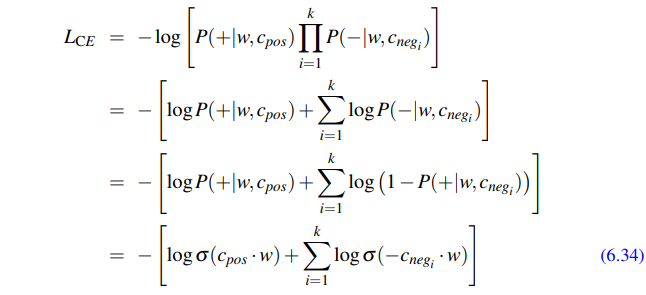
  
Finally, we backpropagate the loss using this set of formulas -  
  
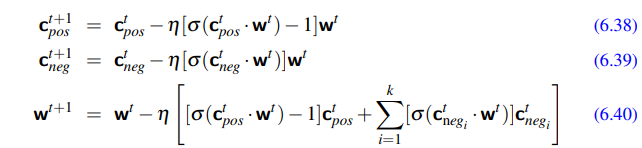

In [73]:
# train model

# learning rate
lr = 9e-5
num_iters = 30

for i in range(num_iters):
    iter_loss = 0
    loss = 0
    for idx, word in enumerate(words):
        cidx = list(range(max(0, idx-WINDOW_SIZE), min(idx+WINDOW_SIZE+1, DOC_SIZE)))
        # find index for each word in the context
        cidx = [word2idx[words[i]] for i in cidx]
        # find index for the center word
        idx = word2idx[word]
        external = [word2idx[w] for w in vocab if word2idx[w] not in cidx]
        neighbors = cidx.copy()
        # remove center word from context to get neighbors
        neighbors.remove(idx)
        center_v = W_center[idx]
        loss = 0
        for c in neighbors:
            cntxt_v = W_cntxt[c]
            # find probability of cntxt being close to the center word
            p = sigmoid(center_v @ cntxt_v)
            # sample negatives
            negs = random.sample(external, k=min(NEG_SAMPLE_RATIO, len(external)))
            for neg in negs:
                neg_v = W_cntxt[neg]
                # update negative probability
                p *= sigmoid(center_v @ (-neg_v))
            loss += -np.log(p)
            # backpropagate
            W_cntxt[c] = cntxt_v - lr * (sigmoid(center_v @ cntxt_v) - 1) * center_v.reshape(1, -1)
            for neg in negs:
                neg_v = W_cntxt[neg]
                W_cntxt[neg] = neg_v - lr * sigmoid(neg_v @ center_v) * center_v.reshape(1, -1)
                W_center[idx] = center_v - lr * sigmoid(neg_v @ center_v) * neg_v.reshape(1, -1)
            W_center[idx] = W_center[idx] - lr * (sigmoid(cntxt_v @ center_v) - 1) * cntxt_v.reshape(1, -1)
        loss /= WINDOW_SIZE
    iter_loss += loss
    print(f"loss for iter {i+1}: {iter_loss:.2f}")

loss for iter 1: 89.22
loss for iter 2: 80.54
loss for iter 3: 73.82
loss for iter 4: 59.39
loss for iter 5: 52.19
loss for iter 6: 43.23
loss for iter 7: 35.33
loss for iter 8: 24.53
loss for iter 9: 17.13
loss for iter 10: 7.98
loss for iter 11: 4.49
loss for iter 12: 3.04
loss for iter 13: 2.46
loss for iter 14: 2.40
loss for iter 15: 2.01
loss for iter 16: 2.92
loss for iter 17: 2.12
loss for iter 18: 1.97
loss for iter 19: 2.05
loss for iter 20: 1.99
loss for iter 21: 1.70
loss for iter 22: 1.57
loss for iter 23: 2.02
loss for iter 24: 1.94
loss for iter 25: 2.11
loss for iter 26: 1.58
loss for iter 27: 1.51
loss for iter 28: 1.56
loss for iter 29: 1.60
loss for iter 30: 1.58


Find embedding for a sample word -

In [74]:
W_center[word2idx['money']]

array([8.91591999e-01, 5.75075252e-01, 6.22479678e-01, 6.02495355e-04,
 3.80147825e-01, 4.50579727e-01, 4.69618564e-01, 2.57398274e-02,
 4.83073792e-01, 9.77128653e-02, 8.31698932e-01, 1.56306136e-01,
 2.69076114e-01, 1.26345059e-01, 7.44733170e-02, 1.52794762e-01,
 1.49556619e-01, 4.23169002e-01, 9.57711494e-01, 7.79416280e-01,
 2.74371951e-01, 9.02877364e-01, 3.94395475e-01, 6.63401215e-01,
 2.51635911e-02, 9.68643343e-01, 6.81073277e-01, 1.75072285e-01,
 3.84036396e-01, 5.88006172e-01, 8.37873371e-01, 2.30466644e-01,
 9.27367485e-01, 2.20272723e-01, 1.09238314e-01, 5.44382468e-01,
 3.49944285e-01, 2.02717511e-02, 2.97267502e-01, 2.42015696e-01,
 9.34797164e-01, 9.58746902e-01, 7.42453234e-01, 8.00261808e-01,
 9.16842790e-01, 7.88783640e-01, 6.59162112e-02, 6.43994159e-01,
 5.38216616e-01, 4.79448606e-01, 3.66823110e-01, 6.93476481e-01,
 7.60709162e-01, 9.79159021e-01, 1.14388856e-01, 7.94558288e-01,
 9.44127147e-01, 5.11765967e-01, 8.63508267e-02, 3.20773707e-01,
 8.23605307e-01, 3.60845222e-01, 1.14878309e-01, 6.65598646e-01,
 2.10825483e-01, 1.46441108e-01, 2.50101897e-01, 7.62924861e-01,
 4.77286334e-01, 2.54830216e-01, 6.32299229e-01, 4.68225715e-01,
 8.43731045e-01, 1.60254048e-01, 8.77669353e-01, 7.92436204e-01,
 4.85972995e-01, 5.24130896e-02, 1.06112408e-01, 1.92152948e-01,
 5.64227417e-01, 5.08866538e-01, 6.78847155e-01, 6.54341101e-01,
 9.28435876e-01, 6.43003568e-01, 2.70843771e-01, 3.67357587e-01,
 4.60148704e-01, 6.13873963e-01, 3.84418480e-01, 6.63711641e-01,
 9.05475186e-02, 3.40994913e-02, 2.87173232e-01, 2.79850365e-01,
 4.03778588e-01, 4.62443170e-01, 7.18741569e-01, 6.44384952e-01])

Now a bit of visualization:

In [108]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# use principal component analysis to reduce dimensionality: 100 -> 4
pca = PCA(n_components=4)

# create an inverse lookup table to find index from word
idx2word = {idx:word for word, idx in word2idx.items()}

In [112]:
def pca4to2(p4):
    p2 = np.zeros((p4.shape[0], 2))
    # weighted: give more weights to first 2 components
    p2[:,0] = 0.75*p4[:,0] + 0.25*p4[:,3]
    p2[:,1] = 0.75*p4[:,1] + 0.25*p4[:,2]
    return p2

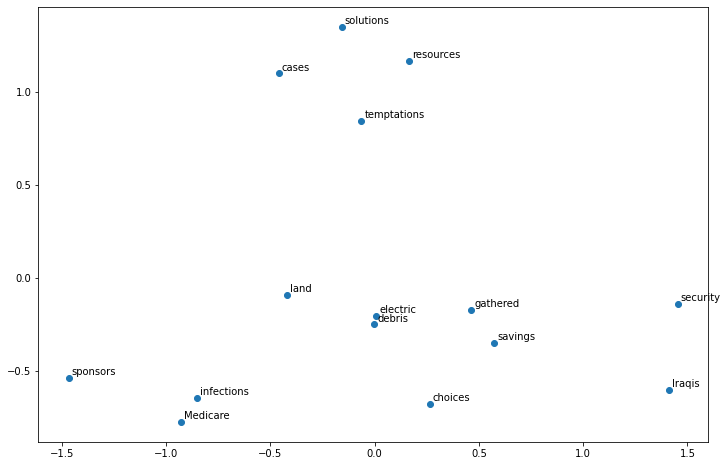

In [121]:
count = 15

# random select to test more critically
idxs = np.random.randint(VOCAB_SIZE, size=count)
testing = W_center[idxs].copy()

# find corresponding words to attach in figure
words = [idx2word[i] for i in idxs]

# decrease dimensionality for 2D visualization: 4 -> 2
projected_points = pca4to2(pca.fit_transform(testing))

plt.figure(figsize=(12, 8))
plt.scatter(projected_points[:,0], projected_points[:,1])
for txt, point in zip(words, projected_points):
    plt.annotate(f'{txt}', xy=(point[0], point[1]), xytext=(3, 3), textcoords='offset points')

# GloVe

GloVe (**Glo**bal **Ve**ctors for Word Representation) is a word embedding model that represents words as dense vectors based on their co-occurrence patterns in a text corpus. It captures semantic and syntactic relationships between words, allowing words with similar meanings or contexts to be mapped to nearby points in a vector space.  
  
This time, we would refer the [GloVe paper](https://aclanthology.org/D14-1162/).  
  
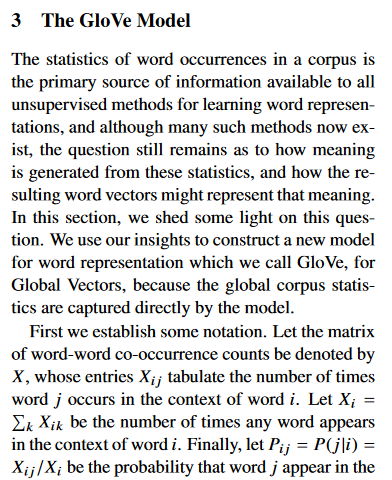

In [ ]:
# we intialize each element of co-occurrence matrix with 1
# to deal with log operation that is to be done during cost estimation
co_matrix = np.full((VOCAB_SIZE, VOCAB_SIZE), 1, dtype=np.float32)

In [ ]:
# fill the matrix
for idx, word in enumerate(words):
    cidx = list(range(max(0, idx-WINDOW_SIZE), min(idx+WINDOW_SIZE+1, DOC_SIZE)))
    cidx = [word2idx[words[i]] for i in cidx]
    idx = word2idx[word]
    neighbors = cidx.copy()
    neighbors.remove(idx)
    # increase count by 1 for each column corresponding to each neighbor
    co_matrix[neighbors] = co_matrix[neighbors] + 1

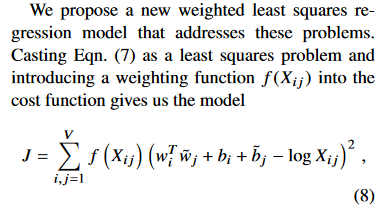  
  
Observing the proposed model, for each word $w$ in our vocabulary, we initialize 2 types of word embedding matrices, and 2 types of biases -
- when $w$ is a center word
- when $w$ is in the context but is not the center word
  
We maintain the same (100) embedding dimension.

In [ ]:
W_w = np.random.rand(VOCAB_SIZE, EMBED_DIM)
W_c = np.random.rand(VOCAB_SIZE, EMBED_DIM)
b_w = np.random.rand(VOCAB_SIZE)
b_c = np.random.rand(VOCAB_SIZE)

Finally, we take the laid-out suggestion for the weight function -

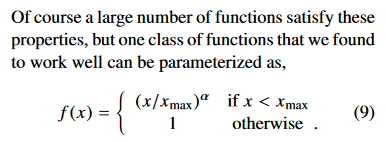
  
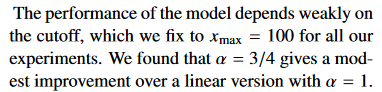

In [ ]:
def weight_function(x, x_max=100, alpha=0.75):
    return (x/x_max)**alpha if x < x_max else 1

In [ ]:
# train

lr = 2e-3
num_iters = 30

for _ in range(num_iters):
    J = 0
    for i in range(VOCAB_SIZE):
        for j in range(VOCAB_SIZE):
            # forward propagation
            J += weight_function(co_matrix[i][j]) * (W_w[i] @ W_c[j] + b_w[i] + b_c[j] - np.log(co_matrix[i][j]))**2
            # find gradients
            dJ_dW_w = weight_function(co_matrix[i][j]) *  \
                      2 * (W_w[i] @ W_c[j] + b_w[i] + b_c[j] + - np.log(co_matrix[i][j])) * W_c[j].reshape(1, -1)
            dJ_dW_c = weight_function(co_matrix[i][j]) *  \
                      2 * (W_w[i] @ W_c[j] + b_w[i] + b_c[j] - np.log(co_matrix[i][j])) * W_w[j].reshape(1, -1)
            dJ_db_w = weight_function(co_matrix[i][j]) * \
                      2 * (W_w[i] @ W_c[j] + b_w[i] + b_c[j] - np.log(co_matrix[i][j]))
            dJ_db_c = weight_function(co_matrix[i][j]) * \
                      2 * (W_w[i] @ W_c[j] + b_w[i] + b_c[j] - np.log(co_matrix[i][j]))
            # backpropagate
            W_w[i] = W_w[i] - lr*dJ_dW_w
            W_c[j] = W_c[j] - lr*dJ_dW_c
            b_w[i] = b_w[i] - lr*dJ_db_w
            b_c[i] = b_c[i] - lr*dJ_db_c
    print(f"Average cost for iter {_ + 1}: {J/VOCAB_SIZE}")

# BERT 
BERT or **B**idrectional **E**ncoder **R**epresentations from **T**ranformers is designed to pre-train bi-directional representations from unlabelled text by jointly conditioning on both left and right context. As a result, the pre-trained BERT model can be fine-tuned with just one additional output layer to create a state of the art model for a wide range of NLP tasks. It was introduced and referenced in this [paper](https://arxiv.org/pdf/1810.04805).

![img](https://www.researchgate.net/publication/349546860/figure/fig2/AS:994573320994818@1614136166736/The-Transformer-based-BERT-base-architecture-with-twelve-encoder-blocks.ppm)

**BERT Architecture with 12 Encoder Blocks**

Unlike word2vec or GLOVe which are context-free models that generate a single word embedding representation for each word in the vocabulary. An instance can be the word 'deposit' would have the same representation in 'sand deposit' and in 'bank deposit'. 

Contextual models like **BERT** instead generate a representation of each word that is based on the other words in the sentence, by capturing word relationships bidirectionally. 

There are four types of pre-trained versions of BERT depending on the scale of the model architecture:

    1. BERT-Base (Cased / Un-Cased): 12-layer, 768-hidden-nodes, 12-attention-heads, 110M parameters
    
    2. BERT-Large (Cased / Un-Cased): 24-layer, 1024-hidden-nodes, 16-attention-heads, 340M parameters

BERT relies on a Transformer (the attention mechanism that learns contextual relationships between words in a text). A basic Transformer consists of an encoder to read the text input and a decoder to produce a prediction for the task. Since BERT’s goal is to generate a language representation model, it only needs the encoder part. The input to the encoder for BERT is a sequence of tokens, which are first converted into vectors and then processed in the neural network. 

![img](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/bert_emnedding.png)

Input embedding is a combination of 3 embeddings:- 
    
    1. Token embeddings: A [CLS] token is added to the input word tokens at the beginning of the first sentence and a [SEP] token is inserted at the end of each sentence.
    
    2. Segment embeddings:A marker indicating Sentence A or Sentence B is added to each token. This allows the encoder to distinguish between sentences.
    
    3. Positional embeddings:A positional embedding is added to each token to indicate its position in the sentence.

### Pre-Training Tasks

1. **Masked Language Modelling**
2. **Next Sentence Prediction**

MLM(masked language modelling) is the task of predicting the next word given a sequence of words. In MLM, instead of predicting every next token, a precentage of input tokens are masked at random and only those masked tokens are predicted. Denoted by **[MASK]**

ABout 80% of the tokens are actually replaced with the token [MASK], 10% are replaced with random token, and rest 10% are left unchanged

Next Sentence Prediction is a binary classification task in which, given a pair of sentences, it is predicted if the second sentence is the actual next sentence of the first sentence. Easy, in case of a monolingual corpus as ours, and is helpful in minimising the loss function. 

![img](https://yashuseth.files.wordpress.com/2019/06/fig5.png?w=442&h=231)

### Implementation

Here however we will be using a pre-trained BERT model and tokenizer from the transformers library, as training the model from scratch requires high computational resources and time

In [5]:
# Import required libraries
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import BertTokenizer, BertModel

In [6]:
LEARNING_RATE = 2e-5
MAX_ITERATIONS = 20
# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load pre-trained BERT model
model = BertModel.from_pretrained('bert-base-uncased')

/opt/python/envs/default/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a m

In [7]:
# Since BERT tokenizer works on sentences will join the `words` list 
sentence = "".join(words).lower()
# Tokenize the sentence and get input IDs and attention masks
inputs = tokenizer(sentence, return_tensors='pt', padding=True, truncation=True) # pt --> pytorch tensor
input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']

In [8]:
# A classifier on top of the embeddings
class BertClassifier(nn.Module):
    def __init__(self, bert_model):
        super(BertClassifier, self).__init__()
        self.bert = bert_model
        self.linear = nn.Linear(bert_model.config.hidden_size, 2)  # Assuming binary classification
    
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]  # CLS token's output
        linear_output = self.linear(cls_output)
        return linear_output

In [9]:
# Initialize the classifier
classifier = BertClassifier(model)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=LEARNING_RATE)

In [10]:
target = torch.tensor([1])  # Batch size of 1

# Training loop
for iteration in range(MAX_ITERATIONS):
    classifier.train()
    
    # Zero gradients
    optimizer.zero_grad()
    
    # Forward pass
    outputs = classifier(input_ids, attention_mask)
    
    # Compute loss
    loss = criterion(outputs, target)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    # Print loss
    print(f'Iteration {iteration + 1}/{MAX_ITERATIONS}, Loss: {loss.item()}')

Iteration 1/20, Loss: 0.6684601902961731
Iteration 2/20, Loss: 0.32331499457359314
Iteration 3/20, Loss: 0.12396910041570663
Iteration 4/20, Loss: 0.037976574152708054
Iteration 5/20, Loss: 0.016252057626843452
Iteration 6/20, Loss: 0.013878156431019306
Iteration 7/20, Loss: 0.0051431492902338505
Iteration 8/20, Loss: 0.0026047846768051386
Iteration 9/20, Loss: 0.00357310613617301
Iteration 10/20, Loss: 0.00220282468944788
Iteration 11/20, Loss: 0.0022082962095737457
Iteration 12/20, Loss: 0.0019396792631596327
Iteration 13/20, Loss: 0.001653733546845615
Iteration 14/20, Loss: 0.0013194911880418658
Iteration 15/20, Loss: 0.001127441762946546
Iteration 16/20, Loss: 0.0014465117128565907
Iteration 17/20, Loss: 0.0009894242975860834
Iteration 18/20, Loss: 0.001303895260207355
Iteration 19/20, Loss: 0.0009843033039942384
Iteration 20/20, Loss: 0.0012832987122237682


In [12]:
# Set the model to evaluation mode 
model.eval() 

# Get embedding for a token 
token_to_embed_1 = 'terrorist'
token_to_embed_2 = 'president'

# Tokenize the word 
tokenized_word_1 = tokenizer(token_to_embed_1,return_tensors='pt')
tokenized_word_2 = tokenizer(token_to_embed_2,return_tensors='pt')


# Forward pass through the BERT model 
with torch.no_grad():
    output_1 = model(**tokenized_word_1)
    output_2 = model(**tokenized_word_2)

# Extract embedding 
token_embedding_1 = output_1.last_hidden_state.mean(dim=1) # mean of all token embeddings
token_embedding_2 = output_2.last_hidden_state.mean(dim=1) # mean of all token embeddings

print(f"Embedding for the word {token_to_embed_1} is: ")
print(token_embedding_1)
print("cosine similarity is:")
print(token_embedding_1@token_embedding_2.reshape(-1,1))

Embedding for the word terrorist is: 
tensor([[ 1.7374e-02, -1.6452e-01, -5.7014e-01, -7.3958e-03, -6.2166e-02,
         -4.3628e-01,  4.7165e-01,  1.9113e-01, -1.1920e-01, -1.7361e-01,
          4.7690e-02, -3.2405e-03, -8.4639e-02,  9.2072e-02, -3.7923e-01,
         -2.8636e-01, -1.3807e-01,  4.1172e-02,  7.0807e-02,  1.3038e-01,
         -1.2498e-01, -1.5599e-01, -1.6036e-02, -1.1918e-01,  5.4789e-02,
          3.0128e-01, -3.6652e-01,  1.3710e-01, -3.2896e-01,  2.1204e-01,
         -1.7523e-01, -6.0807e-02,  1.4287e-02,  2.3996e-01,  2.4385e-01,
          3.9706e-02,  6.9867e-02, -1.2082e-01, -4.2180e-01, -2.0469e-02,
         -1.3474e-01, -2.0092e-01,  2.5502e-01,  1.1924e-01, -1.2062e-01,
         -2.6600e-01, -2.1552e-01,  8.4123e-03, -1.6412e-01, -3.1441e-02,
         -3.5701e-01,  4.4373e-01, -1.7808e-01,  1.7894e-01,  1.7257e-01,
          1.0512e-01,  2.0778e-02, -7.6860e-04,  7.3791e-02, -2.1187e-01,
         -3.9251e-02,  7.4863e-02, -1.2597e-01, -1.3604e-01,  5.8049e-01,
